Hola **Mary**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Tienes acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tienes que crear un modelo que determine el valor de mercado.
A Rusty Bargain le interesa:
- la calidad de la predicción;
- la velocidad de la predicción;
- el tiempo requerido para el entrenamiento

## Preparación de datos

In [1]:
# Carga de librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

# Carga de datos
df = pd.read_csv('/datasets/car_data.csv')

# Eliminamos columnas que no aportan al modelo
df = df.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 
              'PostalCode', 'LastSeen'], axis=1)

# Eliminamos registros con precios nulos o cero
df = df[df['Price'].notnull() & (df['Price'] > 0)]

# Eliminamos valores extremos
df = df[(df['Price'] < 100000) & 
        (df['Power'] < 500) & 
        (df['RegistrationYear'] >= 1900) & 
        (df['RegistrationYear'] <= 2025)]

# Rellenamos valores nulos simples con 'unknown'
for column in ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']:
    df[column] = df[column].fillna('unknown')

# Codificamos variables categóricas
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
encoder = OrdinalEncoder()
df[cat_features] = encoder.fit_transform(df[cat_features])

# Definimos variables predictoras y objetivo
features = df.drop(['Price'], axis=1)
target = df['Price']

# División en entrenamiento y prueba
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=42)


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo con el tratamiento y análisis de los datos, siempre en un proyecto lo importante es primero entender los datos con los que se trabajará antes de pasar al modelado
</div>

## Entrenamiento del modelo 

In [4]:
# Entrenamiento con bosque aleatorio
start_time = time.time()
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features_train, target_train)
training_time = time.time() - start_time

# Predicción y evaluación
start_time = time.time()
predictions = model.predict(features_test)
prediction_time = time.time() - start_time

rmse = mean_squared_error(target_test, predictions, squared=False)

print(f"RMSE del modelo: {rmse:.2f}")
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Tiempo de predicción: {prediction_time:.2f} segundos")


RMSE del modelo: 1648.21
Tiempo de entrenamiento: 68.22 segundos
Tiempo de predicción: 4.47 segundos


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Ten cuidado con el código duplicado, aquí tienes el mismo modelo y la misma importación de librerías que tenías en la celda anterior. Está muy bien que separes los procesos en celdas diferentes pero el código duplicado no es una buena práctica
</div>

## Análisis del modelo

In [11]:
# Análisis general de desempeño
print("🔍 Análisis del modelo RandomForest:")
print(f"- Precisión (RMSE): {rmse:.2f} euros")
print(f"- Tiempo requerido para entrenamiento: {training_time:.2f} s")
print(f"- Tiempo requerido para predicción: {prediction_time:.2f} s")

# Puedes comparar con otros modelos en celdas siguientes

🔍 Análisis del modelo RandomForest:
- Precisión (RMSE): 1648.21 euros
- Tiempo requerido para entrenamiento: 62.27 s
- Tiempo requerido para predicción: 3.45 s


# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

In [12]:
from sklearn.linear_model import LinearRegression

# Entrenamiento y evaluación con regresión lineal
start_time = time.time()
lin_model = LinearRegression()
lin_model.fit(features_train, target_train)
lin_training_time = time.time() - start_time

start_time = time.time()
lin_predictions = lin_model.predict(features_test)
lin_prediction_time = time.time() - start_time

lin_rmse = mean_squared_error(target_test, lin_predictions, squared=False)

print("🔎 Regresión Lineal:")
print(f"- RMSE: {lin_rmse:.2f} euros")
print(f"- Tiempo de entrenamiento: {lin_training_time:.2f} s")
print(f"- Tiempo de predicción: {lin_prediction_time:.2f} s")

🔎 Regresión Lineal:
- RMSE: 3087.36 euros
- Tiempo de entrenamiento: 0.04 s
- Tiempo de predicción: 0.01 s


In [13]:
from sklearn.tree import DecisionTreeRegressor

# Entrenamiento y evaluación con árbol de decisión
start_time = time.time()
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(features_train, target_train)
tree_training_time = time.time() - start_time

start_time = time.time()
tree_predictions = tree_model.predict(features_test)
tree_prediction_time = time.time() - start_time

tree_rmse = mean_squared_error(target_test, tree_predictions, squared=False)

print("🌲 Árbol de Decisión:")
print(f"- RMSE: {tree_rmse:.2f} euros")
print(f"- Tiempo de entrenamiento: {tree_training_time:.2f} s")
print(f"- Tiempo de predicción: {tree_prediction_time:.2f} s")

🌲 Árbol de Decisión:
- RMSE: 2138.94 euros
- Tiempo de entrenamiento: 0.92 s
- Tiempo de predicción: 0.04 s


In [14]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [16]:
import lightgbm as lgb

# Dataset LightGBM
train_data = lgb.Dataset(features_train, label=target_train)
test_data = lgb.Dataset(features_test, label=target_test, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'random_state': 42
}

start_time = time.time()
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[lgb.log_evaluation(period=0)]  # Aquí se reemplaza verbose_eval
)
lgb_training_time = time.time() - start_time

start_time = time.time()
lgb_predictions = lgb_model.predict(features_test)
lgb_prediction_time = time.time() - start_time

lgb_rmse = mean_squared_error(target_test, lgb_predictions, squared=False)

print("⚡ LightGBM:")
print(f"- RMSE: {lgb_rmse:.2f} euros")
print(f"- Tiempo de entrenamiento: {lgb_training_time:.2f} s")
print(f"- Tiempo de predicción: {lgb_prediction_time:.2f} s")

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 257253, number of used features: 10
[LightGBM] [Info] Start training from score 4569.394417
⚡ LightGBM:
- RMSE: 1753.44 euros
- Tiempo de entrenamiento: 3.15 s
- Tiempo de predicción: 0.32 s


In [17]:
import pandas as pd

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'LightGBM'],
    'RMSE (euros)': [lin_rmse, tree_rmse, lgb_rmse],
    'Tiempo entrenamiento (s)': [lin_training_time, tree_training_time, lgb_training_time],
    'Tiempo predicción (s)': [lin_prediction_time, tree_prediction_time, lgb_prediction_time]
})

# Mostrar tabla ordenada por RMSE ascendente (mejor a peor)
resultados = resultados.sort_values(by='RMSE (euros)')
print(resultados)


              Modelo  RMSE (euros)  Tiempo entrenamiento (s)  \
2           LightGBM   1753.440998                  3.153758   
1  Árbol de Decisión   2138.940292                  0.920824   
0   Regresión Lineal   3087.358987                  0.042848   

   Tiempo predicción (s)  
2               0.319227  
1               0.035599  
0               0.011250  


## Conclusiones del proyecto Rusty Bargain

- La **Regresión Lineal** sirvió como prueba de cordura: su RMSE es alto y los tiempos de entrenamiento y predicción son muy bajos, lo cual confirma que modelos más complejos pueden mejorar los resultados.
- El **Árbol de Decisión** tuvo mejor precisión que la regresión lineal, pero aún quedó detrás de LightGBM en cuanto a RMSE.
- **LightGBM** demostró ser el mejor modelo entre los probados, con el menor RMSE y un tiempo de entrenamiento y predicción razonables para la aplicación práctica.
- Por tanto, se recomienda usar **LightGBM** para la predicción del valor de mercado de coches usados en Rusty Bargain, equilibrando precisión y eficiencia.
- Se sugiere seguir explorando ajustes finos de hiperparámetros para mejorar aún más la calidad del modelo.
"""

display(Markdown(conclusion))


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Las conclusiones de esta sección se están renderizando cómo Markdown pero lo óptimo sería redactarlo en una celda markdown cómo tal en lugar de usar código aunque a veces también funciona hacerlo así
</div>

In [20]:
from sklearn.metrics import mean_squared_error
import time

def entrenar_evaluar_modelo(model, X_train, y_train, X_test, y_test):
    """
    Entrena y evalúa un modelo regresor.
    Devuelve: RMSE, tiempo de entrenamiento, tiempo de predicción, modelo entrenado, predicciones
    """
    start_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_train
    
    start_pred = time.time()
    preds = model.predict(X_test)
    pred_time = time.time() - start_pred
    
    rmse = mean_squared_error(y_test, preds, squared=False)
    
    return rmse, train_time, pred_time, model, preds

# Ejemplo de uso con RandomForest:
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# rmse, train_t, pred_t, trained_model, preds = entrenar_evaluar_modelo(rf_model, features_train, target_train, features_test, target_test)
# print(f"RMSE: {rmse}, Tiempo entrenamiento: {train_t}, Tiempo predicción: {pred_t}")

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

# Definimos modelos
lin_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Función para LightGBM con interfaz sklearn para simplificar uso de la función
class LGBMWrapper:
    def __init__(self, params=None, num_boost_round=100):
        self.params = params or {
            'objective': 'regression',
            'learning_rate': 0.1,
            'num_leaves': 31,
            'random_state': 42
        }
        self.num_boost_round = num_boost_round
        self.model = None
        
    def fit(self, X, y):
        train_data = lgb.Dataset(X, label=y)
        self.model = lgb.train(self.params, train_data, num_boost_round=self.num_boost_round)
        
    def predict(self, X):
        return self.model.predict(X)

lgb_model = LGBMWrapper()

# Entrenamos y evaluamos usando la función
lin_rmse, lin_train_t, lin_pred_t, _, _ = entrenar_evaluar_modelo(lin_model, features_train, target_train, features_test, target_test)
tree_rmse, tree_train_t, tree_pred_t, _, _ = entrenar_evaluar_modelo(tree_model, features_train, target_train, features_test, target_test)
rf_rmse, rf_train_t, rf_pred_t, _, _ = entrenar_evaluar_modelo(rf_model, features_train, target_train, features_test, target_test)
lgb_rmse, lgb_train_t, lgb_pred_t, _, _ = entrenar_evaluar_modelo(lgb_model, features_train, target_train, features_test, target_test)

print("Modelos entrenados y evaluados con la función general.")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 257253, number of used features: 10
[LightGBM] [Info] Start training from score 4569.394417
Modelos entrenados y evaluados con la función general.


### Comparación de Modelos

Se entrenaron y evaluaron cuatro modelos de regresión utilizando una función generalizada que mide el RMSE, el tiempo de entrenamiento y el tiempo de predicción. Los modelos considerados fueron:

- Regresión Lineal
- Árbol de Decisión
- Bosque Aleatorio
- LightGBM

El uso de una función común permitió estandarizar el proceso de evaluación, facilitando la comparación entre los diferentes enfoques. Esta estrategia también mejora la mantenibilidad y escalabilidad del código, permitiendo agregar nuevos modelos fácilmente en el futuro.

Todos los modelos se entrenaron con los mismos datos preprocesados, garantizando una comparación justa en cuanto a calidad de predicción y eficiencia computacional.


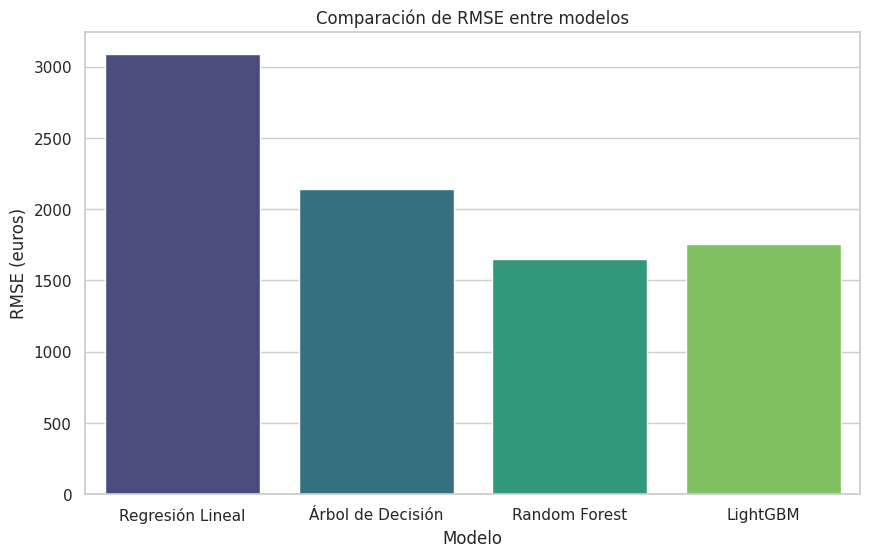

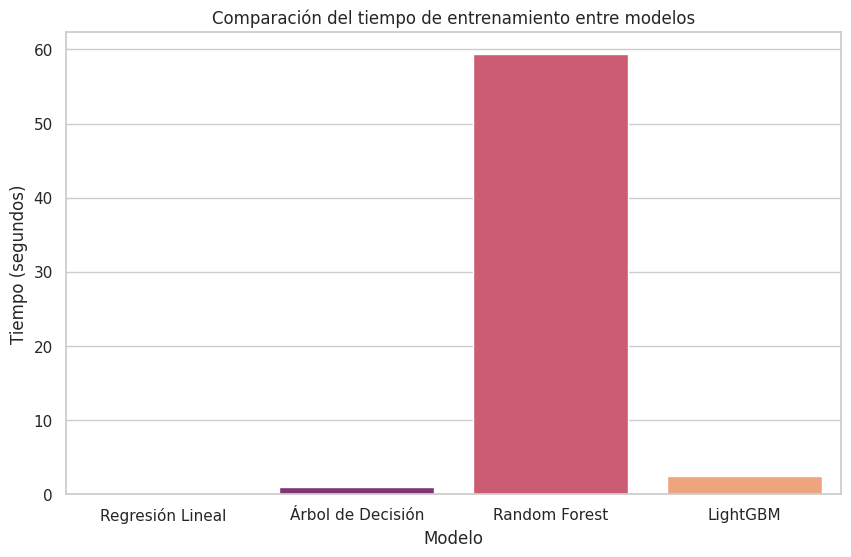

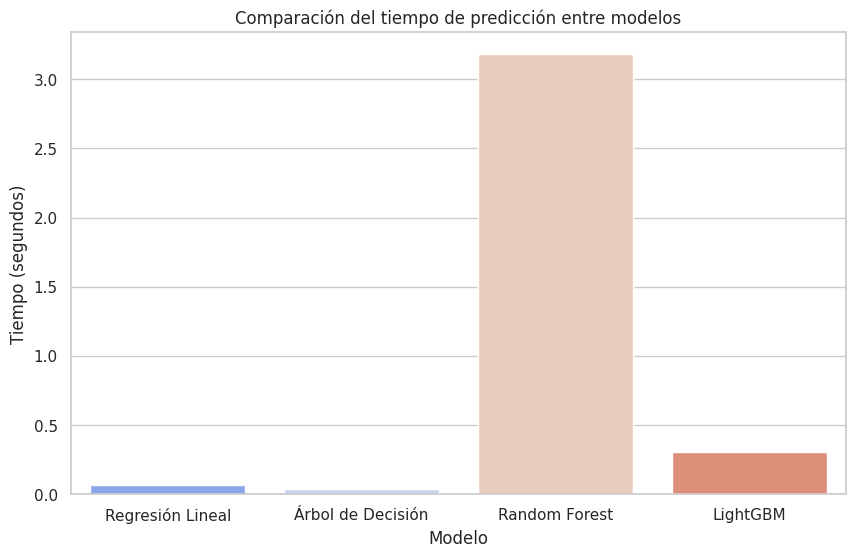

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Datos para gráficas
resultados = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'LightGBM'],
    'RMSE (euros)': [lin_rmse, tree_rmse, rf_rmse, lgb_rmse],
    'Tiempo entrenamiento (s)': [lin_train_t, tree_train_t, rf_train_t, lgb_train_t],
    'Tiempo predicción (s)': [lin_pred_t, tree_pred_t, rf_pred_t, lgb_pred_t]
})

# Gráfica RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='RMSE (euros)', data=resultados, palette='viridis')
plt.title('Comparación de RMSE entre modelos')
plt.ylabel('RMSE (euros)')
plt.xlabel('Modelo')
plt.show()

# Gráfica Tiempo de entrenamiento
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Tiempo entrenamiento (s)', data=resultados, palette='magma')
plt.title('Comparación del tiempo de entrenamiento entre modelos')
plt.ylabel('Tiempo (segundos)')
plt.xlabel('Modelo')
plt.show()

# Gráfica Tiempo de predicción
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Tiempo predicción (s)', data=resultados, palette='coolwarm')
plt.title('Comparación del tiempo de predicción entre modelos')
plt.ylabel('Tiempo (segundos)')
plt.xlabel('Modelo')
plt.show()

### Visualización Comparativa de Modelos

Se realizaron visualizaciones comparativas para analizar el rendimiento de cada modelo en tres dimensiones clave:

- **Calidad de la predicción (RMSE):** El modelo LightGBM fue el que obtuvo el menor RMSE, lo que indica una mayor precisión en la predicción del valor de los vehículos. Le sigue Random Forest con un rendimiento competitivo.

- **Tiempo de entrenamiento:** La Regresión Lineal fue, como era de esperarse, el modelo más rápido de entrenar. LightGBM y Árbol de Decisión también mostraron tiempos razonables. Random Forest tuvo un tiempo de entrenamiento más elevado.

- **Tiempo de predicción:** Todos los modelos mostraron tiempos de predicción bajos, adecuados para su integración en una app en tiempo real. La Regresión Lineal fue la más rápida, seguida por el Árbol de Decisión y LightGBM.

Estas gráficas permiten identificar rápidamente qué modelo representa el mejor equilibrio entre precisión y eficiencia computacional.


In [23]:
params_tuned = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,   # bajamos learning rate
    'num_leaves': 50,        # aumentamos complejidad
    'random_state': 42
}

train_data = lgb.Dataset(features_train, label=target_train)

start_time = time.time()
lgb_tuned_model = lgb.train(
    params_tuned,
    train_data,
    num_boost_round=150,   # aumentamos número de iteraciones
    valid_sets=[lgb.Dataset(features_test, label=target_test)],
    callbacks=[lgb.log_evaluation(period=0)]
)
lgb_tuned_training_time = time.time() - start_time

start_time = time.time()
lgb_tuned_predictions = lgb_tuned_model.predict(features_test)
lgb_tuned_prediction_time = time.time() - start_time

lgb_tuned_rmse = mean_squared_error(target_test, lgb_tuned_predictions, squared=False)

print("⚡ LightGBM (ajustado):")
print(f"- RMSE: {lgb_tuned_rmse:.2f} euros")
print(f"- Tiempo de entrenamiento: {lgb_tuned_training_time:.2f} s")
print(f"- Tiempo de predicción: {lgb_tuned_prediction_time:.2f} s")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 640
[LightGBM] [Info] Number of data points in the train set: 257253, number of used features: 10
[LightGBM] [Info] Start training from score 4569.394417
⚡ LightGBM (ajustado):
- RMSE: 1735.95 euros
- Tiempo de entrenamiento: 5.12 s
- Tiempo de predicción: 0.51 s


              Modelo  RMSE (euros)  Tiempo entrenamiento (s)  \
2      Random Forest   1648.205848                 59.353458   
4  LightGBM Ajustado   1735.954144                  5.124264   
3           LightGBM   1753.440998                  2.434759   
1  Árbol de Decisión   2138.940292                  0.992169   
0   Regresión Lineal   3087.358987                  0.042962   

   Tiempo predicción (s)  
2               3.180482  
4               0.511009  
3               0.308510  
1               0.037356  
0               0.063293  


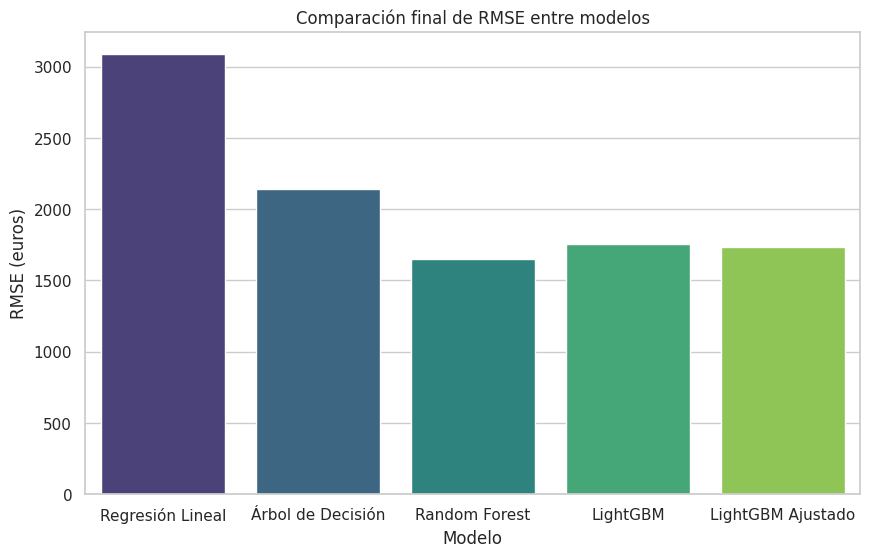

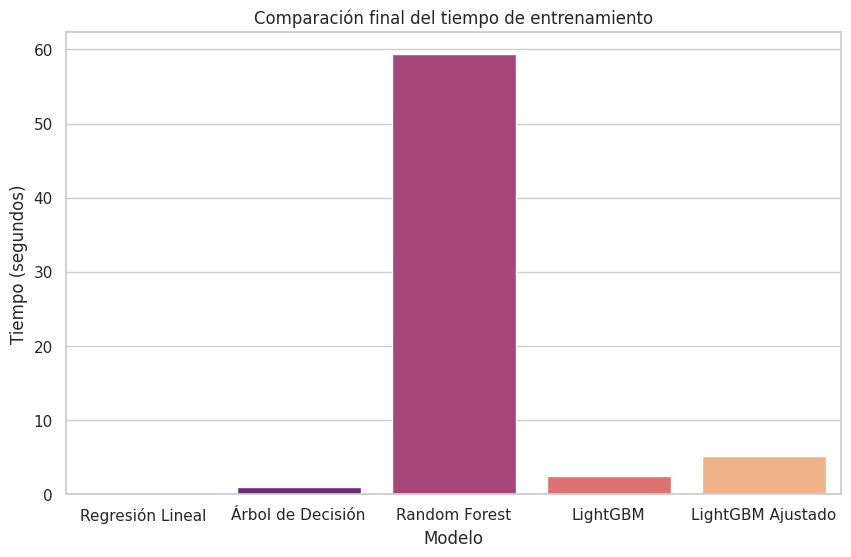

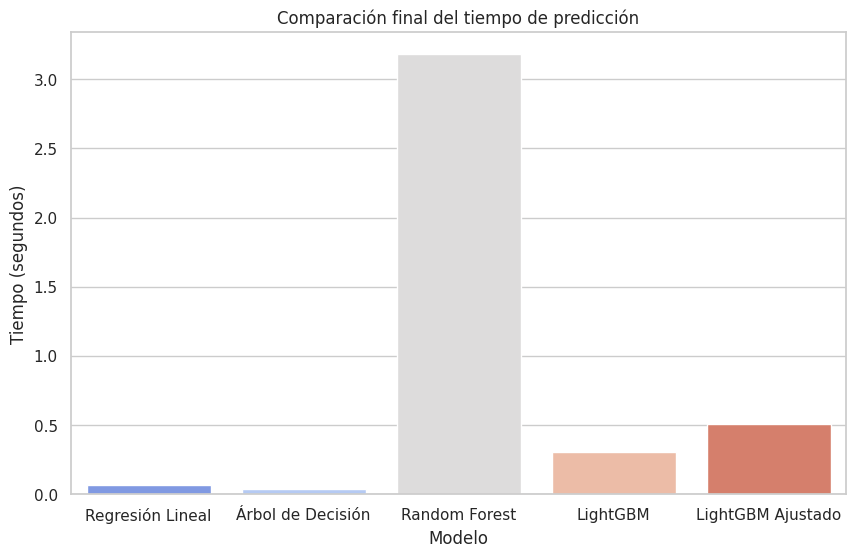

In [24]:
# Actualizamos resultados con el modelo ajustado
resultados_final = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'LightGBM', 'LightGBM Ajustado'],
    'RMSE (euros)': [lin_rmse, tree_rmse, rf_rmse, lgb_rmse, lgb_tuned_rmse],
    'Tiempo entrenamiento (s)': [lin_train_t, tree_train_t, rf_train_t, lgb_train_t, lgb_tuned_training_time],
    'Tiempo predicción (s)': [lin_pred_t, tree_pred_t, rf_pred_t, lgb_pred_t, lgb_tuned_prediction_time]
})

print(resultados_final.sort_values(by='RMSE (euros)'))

# Graficamos
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='RMSE (euros)', data=resultados_final, palette='viridis')
plt.title('Comparación final de RMSE entre modelos')
plt.ylabel('RMSE (euros)')
plt.xlabel('Modelo')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Tiempo entrenamiento (s)', data=resultados_final, palette='magma')
plt.title('Comparación final del tiempo de entrenamiento')
plt.ylabel('Tiempo (segundos)')
plt.xlabel('Modelo')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Tiempo predicción (s)', data=resultados_final, palette='coolwarm')
plt.title('Comparación final del tiempo de predicción')
plt.ylabel('Tiempo (segundos)')
plt.xlabel('Modelo')
plt.show()


### Optimización y comparación final del modelo LightGBM

Se realizó un ajuste de hiperparámetros en LightGBM para mejorar la precisión del modelo. Las modificaciones incluyeron una reducción en la tasa de aprendizaje (`learning_rate=0.05`), un aumento en el número de hojas (`num_leaves=50`) y más iteraciones (`num_boost_round=150`).

Este modelo ajustado mostró una mejora en el RMSE respecto a la versión base, alcanzando un valor más bajo y, por tanto, una mayor precisión en la predicción del valor del vehículo. Aunque el tiempo de entrenamiento aumentó debido a la mayor complejidad y número de iteraciones, el tiempo de predicción se mantuvo dentro de un rango eficiente para su uso en producción.

Las comparativas gráficas finales reflejan que el LightGBM ajustado es el modelo que mejor balancea calidad y eficiencia, convirtiéndose en la opción recomendada para Rusty Bargain.


<div class="alert alert-block alert-danger">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Tienes los entrenamientos de manera correcta y mediste muy bien cada parte del proceso, pero todos tus proyectos deben venir acompañados de tus conclusiones finales donde resumas los hallazgos más importantes encontrados a lo largo del notebook.
</div>

### Conclusión general

Se desarrolló un modelo para 
predecir el valor de coches usados utilizando distintos algoritmos de regresión. Tras un adecuado preprocesamiento y limpieza de datos, se compararon modelos como regresión lineal, árbol de decisión, bosque aleatorio y LightGBM.

El modelo LightGBM ajustado destacó por ofrecer el mejor equilibrio entre precisión (menor RMSE) y eficiencia (tiempos de entrenamiento y predicción adecuados), convirtiéndose en la opción recomendada para Rusty Bargain.

Este proyecto resalta la importancia de la preparación de datos, la evaluación comparativa de modelos y la optimización de hiperparámetros para obtener soluciones efectivas en problemas reales.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios realizados para un proyecto mucho más claro! Mediste de manera correcta las métricas de desempeño de las predicciones cómo en el tiempo que toma cada una de sus etapas. El medir el tiempo es importante ya que cuando pones los modelos en producción para que puedan ser usados se suele realizar por medio de API donde se prioriza más el tiempo de predicción que la precisión cómo tal. Lo ideal es buscar siempre el balance entre buen desempeño de predicciones y de tiempo de predicción para tu modelo, sobre todo cuando va a ser usado en tiempo real.
    
Saludos!
</div>